# Automatic Animal Detection

# Manual Annotation

We collect 200 to 400 images per week.

Human annotation is laborious, automatic detection of animals in images or videos reduces the time taken.

Also, if we are at larger scales say collection of thousands, tens of thousands or hundred of thousands of images manual annotation will become unreasonable.

# Automatic Animal Detection in Images

70 % of the images with animals have either an impala or a zebra

We could also do automatic false trigger or non-animal trigger detection since 60% to 80% of the raw unpublished data  was either a false trigger or triggered by a human , birds or even insects.

The purpose here is to locate the animals in images and videos, detect which animal it is then verify.  

In [1]:
#file and folder libraries
import pandas as pd
import numpy as np

#system libraries
import os
os.makedirs('output', exist_ok = True)
from datetime import datetime

import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
#this is a open source pretrained model
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
#if running on colab
#!git clone https://github.com/DeKUT-DSAIL/ieee-africon-2023.git

In [4]:
#load animal detection model

#Locally Run
model = torch.hub.load(r'yolov5', 'custom', path=r'models/lasst.pt', source='local',force_reload=True)

#Run in Colab
#model = torch.hub.load(r'yolov5', 'custom', path=r'/content/ieee-africon-2023/ml-development/models/lasst.pt', source='local',force_reload=True)
print('Detection model has loaded')

#Set the confidence which you require from the model
model.conf = 0.45

YOLOv5  v7.0-211-g94e943e Python-3.11.4 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients
Adding AutoShape... 


Detection model has loaded


In [5]:
#Run Locally
def detect_and_save_custom(file):
    results = model('dataset/images/'+file+'.jpg')
    print(results)
    %matplotlib inline
    pred = np.squeeze(results.render())
    plt.imshow(pred)
    plt.axis("off")
    plt.show()
    plt.imsave('output/'+file+'_detected.jpg',pred)

# Run in Colab
# def detect_and_save_custom(file):
#     results = model('/content/ieee-africon-2023/ml-development/dataset/images/'+file+'.jpg')
#     print(results)
#     %matplotlib inline
#     pred = np.squeeze(results.render())
#     plt.imshow(pred)
#     plt.axis("off")
#     plt.show()
#     plt.imsave('output/'+file+'_detected.jpg',pred)

image 1/1: 720x1280 1 impala
Speed: 78.3ms pre-process, 676.1ms inference, 2.1ms NMS per image at shape (1, 3, 384, 640)


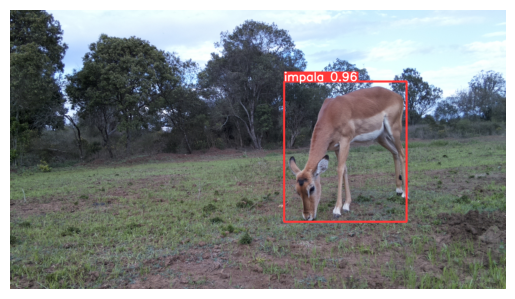

In [6]:
detect_and_save_custom('impala')

image 1/1: 720x1280 1 other
Speed: 44.2ms pre-process, 672.0ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)


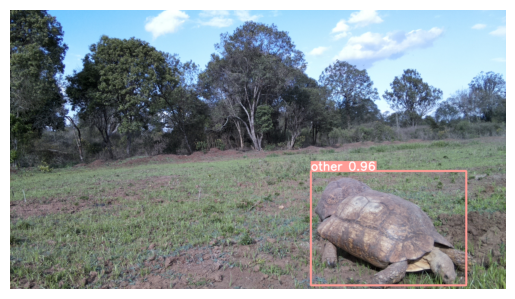

In [7]:
detect_and_save_custom('tortoise')

image 1/1: 720x1280 1 other
Speed: 45.8ms pre-process, 826.2ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


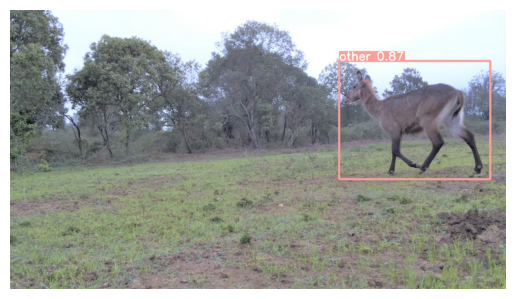

In [8]:
detect_and_save_custom('waterbuck')

image 1/1: 720x1280 4 impalas, 1 other
Speed: 47.3ms pre-process, 714.8ms inference, 3.8ms NMS per image at shape (1, 3, 384, 640)


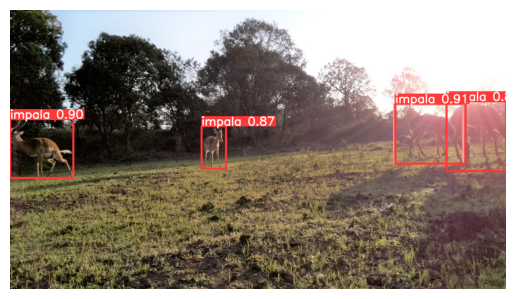

In [9]:
detect_and_save_custom('impalas-warthogs')

## Automatic detection on multiple images

- It took 2 weeks to manually annotate 8554 images, a rate of 25 images per hour.

- Automatically it takes about two hours.



In [10]:
!python3 yolo-inference.py

Detection model has loaded
image 1/1: 720x1280 2 impalas
Speed: 51.1ms pre-process, 542.9ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)
image 1/1: 720x1280 1 impala
Speed: 40.2ms pre-process, 548.8ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)
image 1/1: 720x1280 4 impalas, 1 other
Speed: 38.1ms pre-process, 534.0ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)
image 1/1: 720x1280 1 other
Speed: 52.6ms pre-process, 528.0ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)
image 1/1: 720x1280 1 other
Speed: 40.6ms pre-process, 515.0ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)
image 1/1: 720x1280 1 zebra
Speed: 44.1ms pre-process, 466.4ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)
image 1/1: 720x1280 1 zebra
Speed: 61.1ms pre-process, 504.2ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)
image 1/1: 720x1280 (no detections)
Speed: 50.2ms pre-process, 514.8ms inference, 0.0ms NMS per image at shape (1, 3, 3

YOLOv5  2022-11-19 Python-3.10.11 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients
Adding AutoShape... 
